In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def randomWalkTD0(alpha = 0.1, gamma=1, values = np.zeros(7)):
  nodes = ["Left", "A", "B", "C", "D", "E", "Right"]
  position = 3 #"C"
  node = nodes[position]
  terminated = False

  while not terminated:
    direction = np.random.choice(["left", "right"])

    if direction == "left":
      new_position = position - 1
    elif direction == "right":
      new_position = position + 1

    reward = 1.0 if nodes[new_position] == "Right" else 0.0

    if nodes[new_position] in ("Left","Right"):
      reward = 1.0 if nodes[new_position] == "Right" else 0.0
    else:
      reward = 1.0 if nodes[new_position] == "Right" else 0.0
      reward += gamma * values[new_position]
    
    values[position] += alpha * (reward - values[position])

    position = new_position
    node = nodes[position]

    if (node == "Left") or (node == "Right"):
      terminated = True

  return values

In [ ]:
def randomWalkTDL(alpha = 0.01, gamma=1, lmbda=0, values = np.zeros(7)):
  nodes = ["Left", "A", "B", "C", "D", "E", "Right"]
  position = 3 #"C"
  node = nodes[position]
  terminated = False
  i = 0
  G = 0
  GL = 0

  while not terminated:
    direction = np.random.choice(["left", "right"])

    if direction == "left":
      new_position = position - 1
    elif direction == "right":
      new_position = position + 1

    reward = 1.0 if nodes[new_position] == "Right" else 0.0

    if nodes[new_position] in ("Left","Right"):
      reward = 1.0 if nodes[new_position] == "Right" else 0.0
    else:
      reward = 1.0 if nodes[new_position] == "Right" else 0.0
      reward += gamma * values[new_position]
    
    G += np.power(gamma, i) * reward
    i += 1.0
    GL += (1-lmbda) * G
    values[position] += alpha * (GL - values[position])

    position = new_position
    node = nodes[position]

    if (node == "Left") or (node == "Right"):
      terminated = True
      G += np.power(gamma, i+1) * values[position]
      GL += (1-lmbda) * G
      values[position] += alpha * (GL - values[position])

  return values

In [ ]:
def randomWalkIncMC(gamma=1, values = np.zeros(7)):
  nodes = ["Left", "A", "B", "C", "D", "E", "Right"]
  position = 3 #"C"
  node = nodes[position]
  terminated = False
  i = 0
  N = 0
  G = 0

  while not terminated:
    direction = np.random.choice(["left", "right"])

    if direction == "left":
      new_position = position - 1
    elif direction == "right":
      new_position = position + 1

    reward = 1.0 if nodes[new_position] == "Right" else 0.0

    if nodes[new_position] in ("Left","Right"):
      reward = 1.0 if nodes[new_position] == "Right" else 0.0
    else:
      reward = 1.0 if nodes[new_position] == "Right" else 0.0
      reward += gamma * values[new_position]
    
    G += np.power(gamma, i) * reward
    i += 1.0
    N += 1.0
    position = new_position
    node = nodes[position]

    if (node == "Left") or (node == "Right"):
      terminated = True

  values[position] += 1/(N) * (G-values[position])

  return values

Random Walk by Temporal Difference Zero for Different Values of Alpha: 



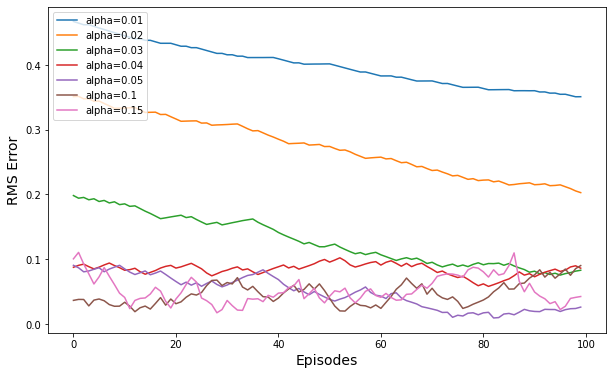

In [ ]:
print("Random Walk by Temporal Difference Zero for Different Values of Alpha: \n")
walks = 100
alphas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15]
actual_state_values = np.linspace(0, 1, 7)
actual_state_values[0] = 0
actual_state_values[-1] = 0

plt.figure(figsize=[10, 6])
for alpha in alphas:
  alpha_errors = []
  for episode in range(walks):
    values = randomWalkTD0(alpha=alpha)
    rmse = np.sqrt(np.mean(np.power(values - actual_state_values, 2)))
    alpha_errors.append(rmse)
    
  plt.plot(alpha_errors, label="alpha={}".format(alpha))
plt.xlabel("Episodes", size=14)
plt.ylabel("RMS Error", size=14)
plt.legend(loc='upper left')
plt.show()

Random Walk by Temporal Difference Lambda for Different Values of Lambda: 



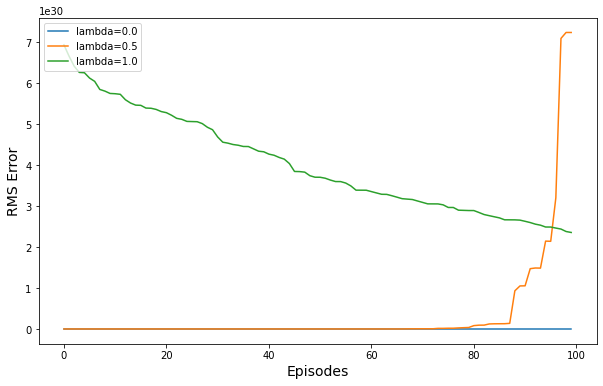

In [ ]:
print("Random Walk by Temporal Difference Lambda for Different Values of Lambda: \n")
lambdas = [0.0, 0.5, 1.0]

plt.figure(figsize=[10, 6])
for lmbda in lambdas:
  alpha_errors = []
  for episode in range(walks):
    values = randomWalkTDL(lmbda=lmbda)
    rmse = np.sqrt(np.mean(np.power(values - actual_state_values, 2)))
    alpha_errors.append(rmse)
    
  plt.plot(alpha_errors, label="lambda={}".format(lmbda))
plt.xlabel("Episodes", size=14)
plt.ylabel("RMS Error", size=14)
plt.legend(loc='upper left')
plt.show()

Random Walk by Incremental Monte-Carlo: 



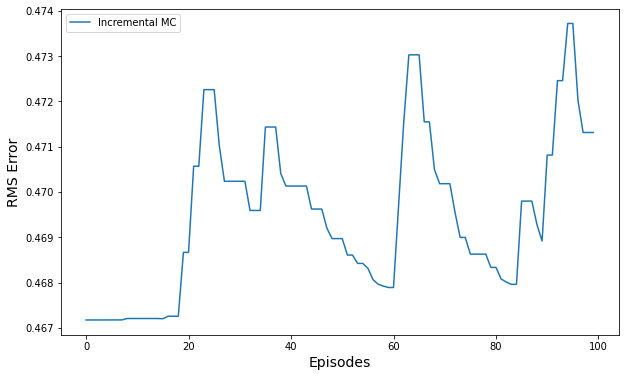

In [ ]:
print("Random Walk by Incremental Monte-Carlo: \n")
plt.figure(figsize=[10, 6])
alpha_errors = []
for episode in range(walks):
  values = randomWalkIncMC(gamma=0.5)
  rmse = np.sqrt(np.mean(np.power(values - actual_state_values, 2)))
  alpha_errors.append(rmse)
  
plt.plot(alpha_errors, label="Incremental MC")
plt.xlabel("Episodes", size=14)
plt.ylabel("RMS Error", size=14)
plt.legend(loc='upper left')
plt.show()